In [1]:
#!pip install umap-learn
#!pip install hdbscan
#!pip install --upgrade pip
#!pip install sentencepiece
#!pip install BigBirdTokenizer
#!pip install sentence-transformers
#!pip install transformers
#!pip install MulticoreTSNE
#!pip install wordcloud
#!pip install pm4py

#!pip install wordcloud
#!pip install python-graphviz
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz
#!apt-get install graphviz -y

In [2]:
#!pip install jax==0.4.18
#!pip install jaxlib==0.4.18

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
from sentence_transformers import SentenceTransformer

tqdm.pandas()
%matplotlib inline

In [4]:
df_meta = pd.read_fwf('./data/all_meta.dat',  sep='*$*', header=None)
df_meta['start']=0
df_meta['start'][df_meta[0]=='*$*']=1
df_meta['id']=df_meta['start'].cumsum()
df_meta['N']=df_meta.groupby(["id"]).cumcount()
df_meta[0]=df_meta[0].str.lower()
df_meta



/tmp/ipykernel_1614766/3592793881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['start'][df_meta[0]=='*$*']=1


,0,1,2,start,id,N
0,*$*,NaN,NaN,1,1,0
1,дата выхода: 2023-04-11,NaN,NaN,0,1,1
2,установлены результаты первого из трех башен в...,NaN,NaN,0,1,2
3,(контингент: cgn-20180529004),NaN,NaN,0,1,3
4,первый три башни проекта морской ветровой энер...,NaN,NaN,0,1,4
...,...,...,...,...,...,...
51221,тел.: 0755-8447860,NaN,NaN,0,1935,21
51222,электронная почта:,NaN,NaN,0,1935,22
51223,pengxiongbing@cgnpc.com.cn,NaN,NaN,0,1935,23
51224,участник торгов или его главный руководитель (...,NaN,NaN,0,1935,24


In [5]:
df_applic = pd.read_fwf('./data/all_applic.dat',  sep='*$*', header=None)
df_applic['start']=0
df_applic['start'][df_applic[0]=='*$*']=1
df_applic['id']=df_applic['start'].cumsum()
df_applic['N']=df_applic.groupby(["id"]).cumcount()
df_applic[0]=df_applic[0].str.lower()
df_applic

/tmp/ipykernel_1614766/2664503295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_applic['start'][df_applic[0]=='*$*']=1


,0,start,id,N
0,*$*,1,1,0
1,20230731_12345,0,1,1
2,китайский документ 22-9trans.txt,0,1,2
3,глава i уведомление о торгах,0,1,3
4,"территория, в которой осуществляется тендерный...",0,1,4
...,...,...,...,...
104018,3) после успешной регистрации участника торгов...,0,1429,78
104019,5) участники торгов должны завершить регистрац...,0,1429,79
104020,"закрытие. участники торгов, которые не предста...",0,1429,80
104021,"документы, полученные в результате недействите...",0,1429,81


In [6]:
%%time
from sentence_transformers import SentenceTransformer
df_meta[0]=df_meta[0]+' '
rez_meta=df_meta[df_meta['N']>1].groupby(["id"]).sum()

CPU times: user 33.9 ms, sys: 993 µs, total: 34.9 ms
Wall time: 33.3 ms


In [7]:
rez_meta['data']=df_meta[df_meta['N']==1].groupby(["id"]).sum()[0]
rez_meta

,0,1,2,start,N,data
id,,,,,,
1,установлены результаты первого из трех башен в...,0,0,0,350,дата выхода: 2023-04-11
2,информация о результатах в системе физической ...,пункт,(пакет),0,324,дата выхода: 2023-04-10
3,"3-я атомная атомная электростанция китая, авст...",0,0,0,324,дата выхода: 2023-04-17
4,результаты проекта &lt; &lt; озеленение &gt; &...,0,0,0,350,дата выхода: 2023-02-07
5,результаты генерального контракта на строитель...,0,0,0,350,дата выхода: 2023-02-07
...,...,...,...,...,...,...
1931,mx и px-комнатная служба по совершенствованию ...,рпрай,лимите,0,377,дата выхода: 2023-09-22
1932,ускоритель нейтрона для производства радиоизот...,0,0,0,377,дата выхода: 2023-09-22
1933,в 2023-2025 гг. в рамках комплексной программы...,t; &g,; (реги,0,350,дата выхода: 2023-09-20


In [8]:


corpus=rez_meta[0].values
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
embeddings = model.encode(corpus)


#Снижаем размерность
import umap
umap_embeddings = umap.UMAP(n_neighbors=15).fit_transform(embeddings)


import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=10,metric='euclidean', core_dist_n_jobs=-1,                      
                          cluster_selection_method='eom').fit(umap_embeddings)


2023-12-16 19:51:23.680528: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 19:51:23.680615: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 19:51:23.680649: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


CPU times: user 1min 5s, sys: 2.39 s, total: 1min 8s
Wall time: 5.24 s


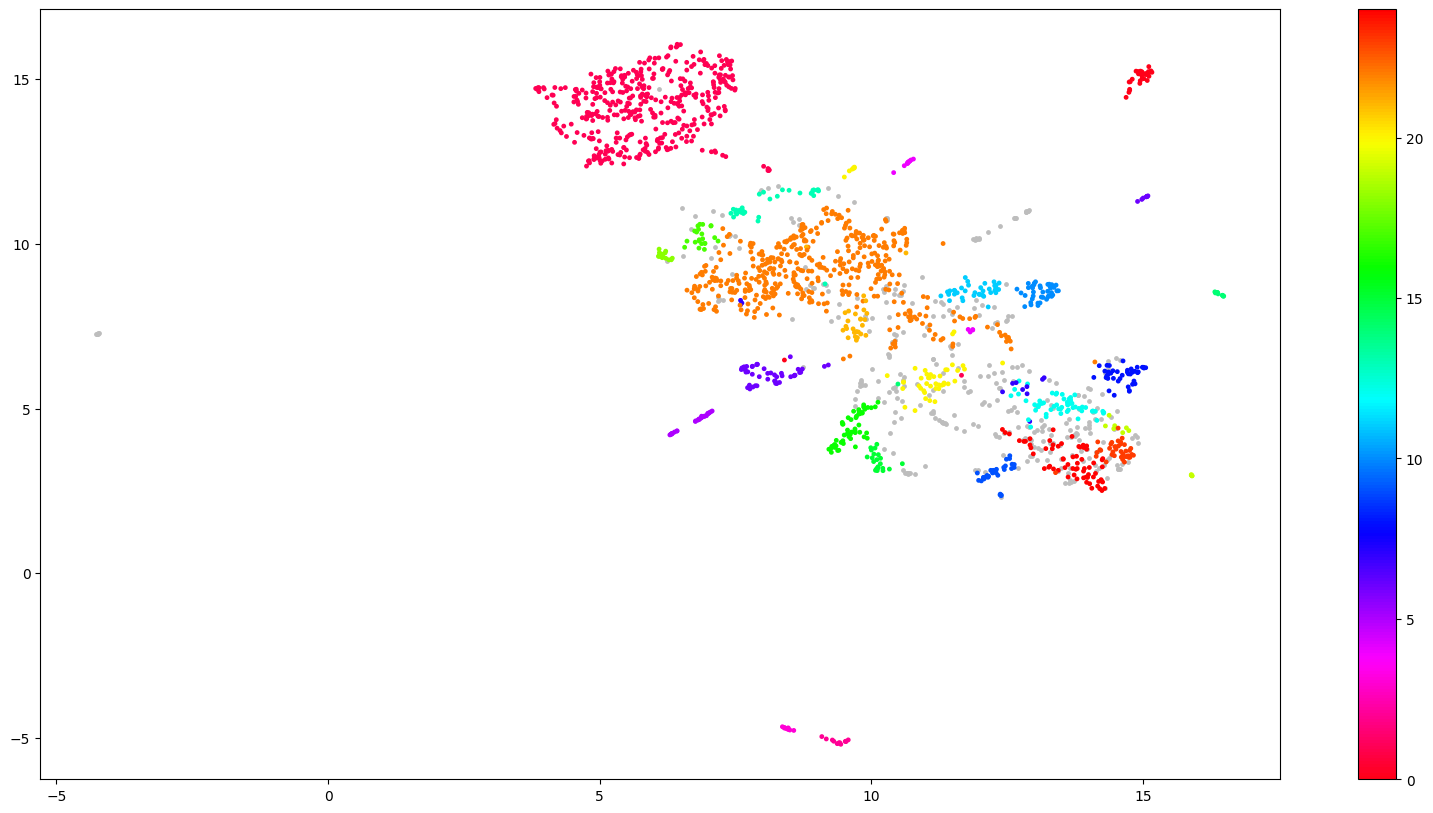

In [9]:
%%time

import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=7, n_components=2, min_dist=0.2).fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
rez_meta['labels'] = cluster.labels_
rez_meta['corpus']=corpus
rez_meta['x']=result['x'].values
rez_meta['y']=result['y'].values


fig, ax = plt.subplots(figsize=(20, 10))
outliers = rez_meta.loc[rez_meta.labels == -1, :]
clustered = rez_meta.loc[rez_meta.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=6)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=6, cmap='hsv_r')
plt.colorbar()



In [10]:
df_applic

,0,start,id,N
0,*$*,1,1,0
1,20230731_12345,0,1,1
2,китайский документ 22-9trans.txt,0,1,2
3,глава i уведомление о торгах,0,1,3
4,"территория, в которой осуществляется тендерный...",0,1,4
...,...,...,...,...
104018,3) после успешной регистрации участника торгов...,0,1429,78
104019,5) участники торгов должны завершить регистрац...,0,1429,79
104020,"закрытие. участники торгов, которые не предста...",0,1429,80
104021,"документы, полученные в результате недействите...",0,1429,81


In [11]:
%%time

df_applic[0]=df_applic[0]+' '
rez_applic=df_applic[df_applic['N']>1].groupby(["id"]).sum()
rez_applic['data']=df_applic[df_applic['N']==1].groupby(["id"]).sum()[0]
rez_applic['data']=rez_applic['data'].str.replace('_12345', '')
rez_applic['data']=pd.to_datetime(rez_applic['data'].str.replace('\D', '', regex=True))



corpus=rez_applic[0].values

model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
embeddings = model.encode(corpus)

#Снижаем размерность
import umap
umap_embeddings = umap.UMAP(n_neighbors=15).fit_transform(embeddings)


import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=10,metric='euclidean', core_dist_n_jobs=-1,                      
                          cluster_selection_method='eom').fit(umap_embeddings)


CPU times: user 2min 7s, sys: 11.2 s, total: 2min 18s
Wall time: 25.2 s


In [12]:
rez_applic

,0,start,N,data
id,,,,
1,китайский документ 22-9trans.txt глава i уведо...,0,2015,2023-07-31
2,китайский документ 85-8trans.txt глава i уведо...,0,1595,2023-07-31
3,китайский документ 8-8trans.txt синьцзян-китай...,0,2849,2023-07-31
4,китайский документ 67-9trans.txt хубэй собирае...,0,3002,2023-07-31
5,китайский документ 1-10trans.txt глава i уведо...,0,5885,2023-07-31
...,...,...,...,...
1425,китайский документ 22-6trans.txt глава i уведо...,0,1952,2023-07-31
1426,китайский документ 32-14trans.txt глава i увед...,0,2210,2023-07-31
1427,китайский документ 73-15trans.txt глава i увед...,0,2079,2023-07-31


CPU times: user 48.4 s, sys: 2.34 s, total: 50.7 s
Wall time: 3.89 s


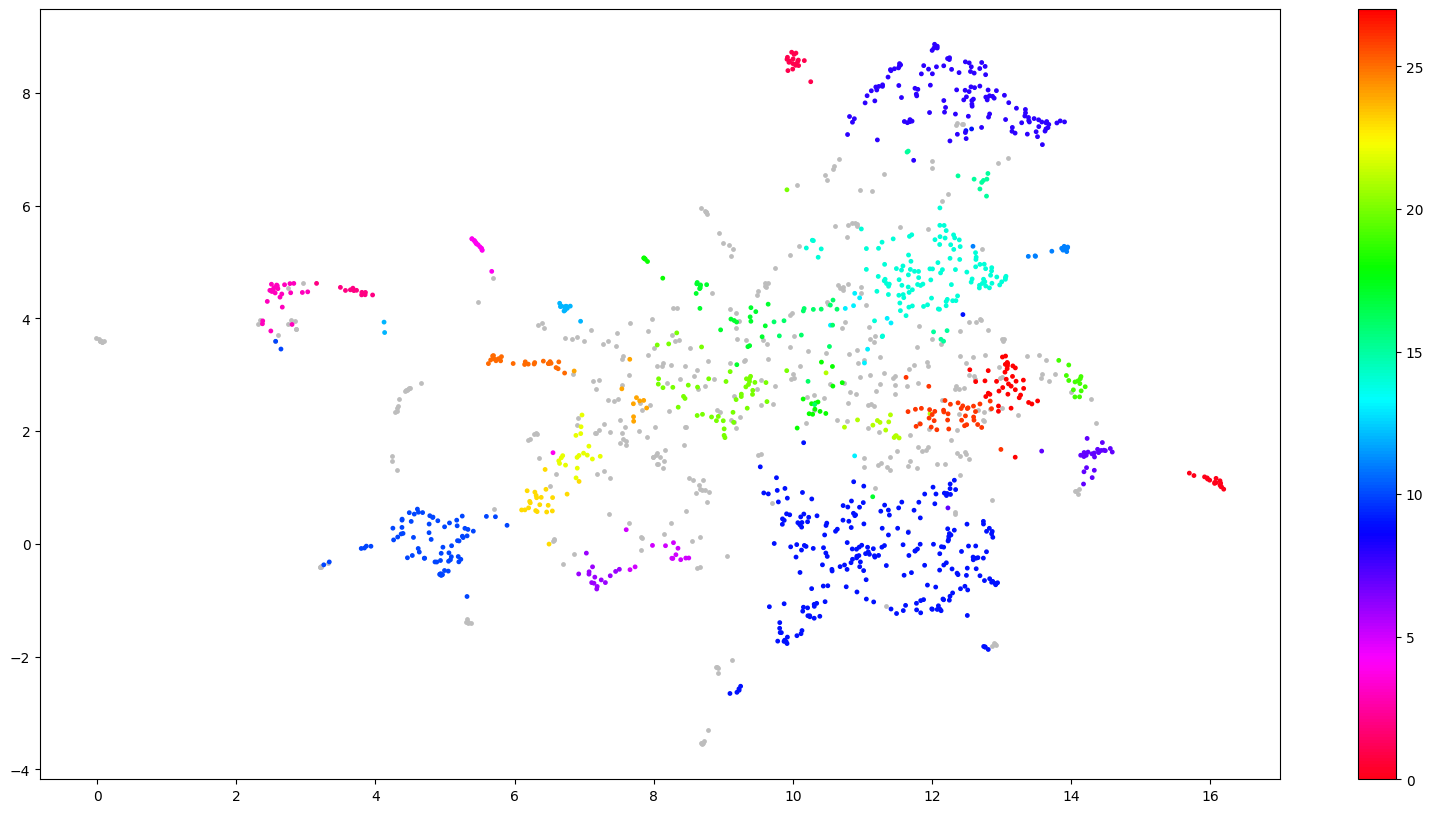

In [13]:
%%time

import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=7, n_components=2, min_dist=0.2).fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
rez_applic['labels'] = cluster.labels_
rez_applic['corpus']=corpus
rez_applic['x']=result['x'].values
rez_applic['y']=result['y'].values


fig, ax = plt.subplots(figsize=(20, 10))
outliers = rez_applic.loc[rez_applic.labels == -1, :]
clustered = rez_applic.loc[rez_applic.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=6)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=6, cmap='hsv_r')
plt.colorbar()



In [14]:
rez_all=pd.concat([rez_meta,rez_applic],axis=0)
rez_all

,0,1,2,start,N,data,labels,corpus,x,y
id,,,,,,,,,,
1,установлены результаты первого из трех башен в...,0,0,0,350,дата выхода: 2023-04-11,-1,установлены результаты первого из трех башен в...,12.091084,3.070503
2,информация о результатах в системе физической ...,пункт,(пакет),0,324,дата выхода: 2023-04-10,1,информация о результатах в системе физической ...,5.689874,15.140570
3,"3-я атомная атомная электростанция китая, авст...",0,0,0,324,дата выхода: 2023-04-17,22,"3-я атомная атомная электростанция китая, авст...",8.495545,9.453926
4,результаты проекта &lt; &lt; озеленение &gt; &...,0,0,0,350,дата выхода: 2023-02-07,22,результаты проекта &lt; &lt; озеленение &gt; &...,8.087262,8.397106
5,результаты генерального контракта на строитель...,0,0,0,350,дата выхода: 2023-02-07,22,результаты генерального контракта на строитель...,8.185848,8.052899
...,...,...,...,...,...,...,...,...,...,...
1425,китайский документ 22-6trans.txt глава i уведо...,NaN,NaN,0,1952,2023-07-31 00:00:00,20,китайский документ 22-6trans.txt глава i уведо...,9.148009,2.155933
1426,китайский документ 32-14trans.txt глава i увед...,NaN,NaN,0,2210,2023-07-31 00:00:00,23,китайский документ 32-14trans.txt глава i увед...,6.316773,0.817792
1427,китайский документ 73-15trans.txt глава i увед...,NaN,NaN,0,2079,2023-07-31 00:00:00,9,китайский документ 73-15trans.txt глава i увед...,12.113812,-1.160054


In [15]:
rez_applic

,0,start,N,data,labels,corpus,x,y
id,,,,,,,,
1,китайский документ 22-9trans.txt глава i уведо...,0,2015,2023-07-31,20,китайский документ 22-9trans.txt глава i уведо...,8.998889,2.183965
2,китайский документ 85-8trans.txt глава i уведо...,0,1595,2023-07-31,4,китайский документ 85-8trans.txt глава i уведо...,5.534750,5.207058
3,китайский документ 8-8trans.txt синьцзян-китай...,0,2849,2023-07-31,-1,китайский документ 8-8trans.txt синьцзян-китай...,4.498154,2.766464
4,китайский документ 67-9trans.txt хубэй собирае...,0,3002,2023-07-31,-1,китайский документ 67-9trans.txt хубэй собирае...,8.271035,4.177397
5,китайский документ 1-10trans.txt глава i уведо...,0,5885,2023-07-31,-1,китайский документ 1-10trans.txt глава i уведо...,10.530039,2.836051
...,...,...,...,...,...,...,...,...
1425,китайский документ 22-6trans.txt глава i уведо...,0,1952,2023-07-31,20,китайский документ 22-6trans.txt глава i уведо...,9.148009,2.155933
1426,китайский документ 32-14trans.txt глава i увед...,0,2210,2023-07-31,23,китайский документ 32-14trans.txt глава i увед...,6.316773,0.817792
1427,китайский документ 73-15trans.txt глава i увед...,0,2079,2023-07-31,9,китайский документ 73-15trans.txt глава i увед...,12.113812,-1.160054


In [16]:
corpus=rez_all[0].values

model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
embeddings = model.encode(corpus)

#Снижаем размерность
import umap
umap_embeddings = umap.UMAP(n_neighbors=15).fit_transform(embeddings)


import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=10,metric='euclidean', core_dist_n_jobs=-1,                      
                          cluster_selection_method='eom').fit(umap_embeddings)


In [17]:
rez_all

,0,1,2,start,N,data,labels,corpus,x,y
id,,,,,,,,,,
1,установлены результаты первого из трех башен в...,0,0,0,350,дата выхода: 2023-04-11,-1,установлены результаты первого из трех башен в...,12.091084,3.070503
2,информация о результатах в системе физической ...,пункт,(пакет),0,324,дата выхода: 2023-04-10,1,информация о результатах в системе физической ...,5.689874,15.140570
3,"3-я атомная атомная электростанция китая, авст...",0,0,0,324,дата выхода: 2023-04-17,22,"3-я атомная атомная электростанция китая, авст...",8.495545,9.453926
4,результаты проекта &lt; &lt; озеленение &gt; &...,0,0,0,350,дата выхода: 2023-02-07,22,результаты проекта &lt; &lt; озеленение &gt; &...,8.087262,8.397106
5,результаты генерального контракта на строитель...,0,0,0,350,дата выхода: 2023-02-07,22,результаты генерального контракта на строитель...,8.185848,8.052899
...,...,...,...,...,...,...,...,...,...,...
1425,китайский документ 22-6trans.txt глава i уведо...,NaN,NaN,0,1952,2023-07-31 00:00:00,20,китайский документ 22-6trans.txt глава i уведо...,9.148009,2.155933
1426,китайский документ 32-14trans.txt глава i увед...,NaN,NaN,0,2210,2023-07-31 00:00:00,23,китайский документ 32-14trans.txt глава i увед...,6.316773,0.817792
1427,китайский документ 73-15trans.txt глава i увед...,NaN,NaN,0,2079,2023-07-31 00:00:00,9,китайский документ 73-15trans.txt глава i увед...,12.113812,-1.160054


In [18]:
%%time

import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=7, n_components=2, min_dist=0.2).fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
rez_all['labels'] = cluster.labels_
rez_all['corpus']=corpus
rez_all['x']=result['x'].values
rez_all['y']=result['y'].values


CPU times: user 1min 47s, sys: 2.8 s, total: 1min 50s
Wall time: 10.3 s


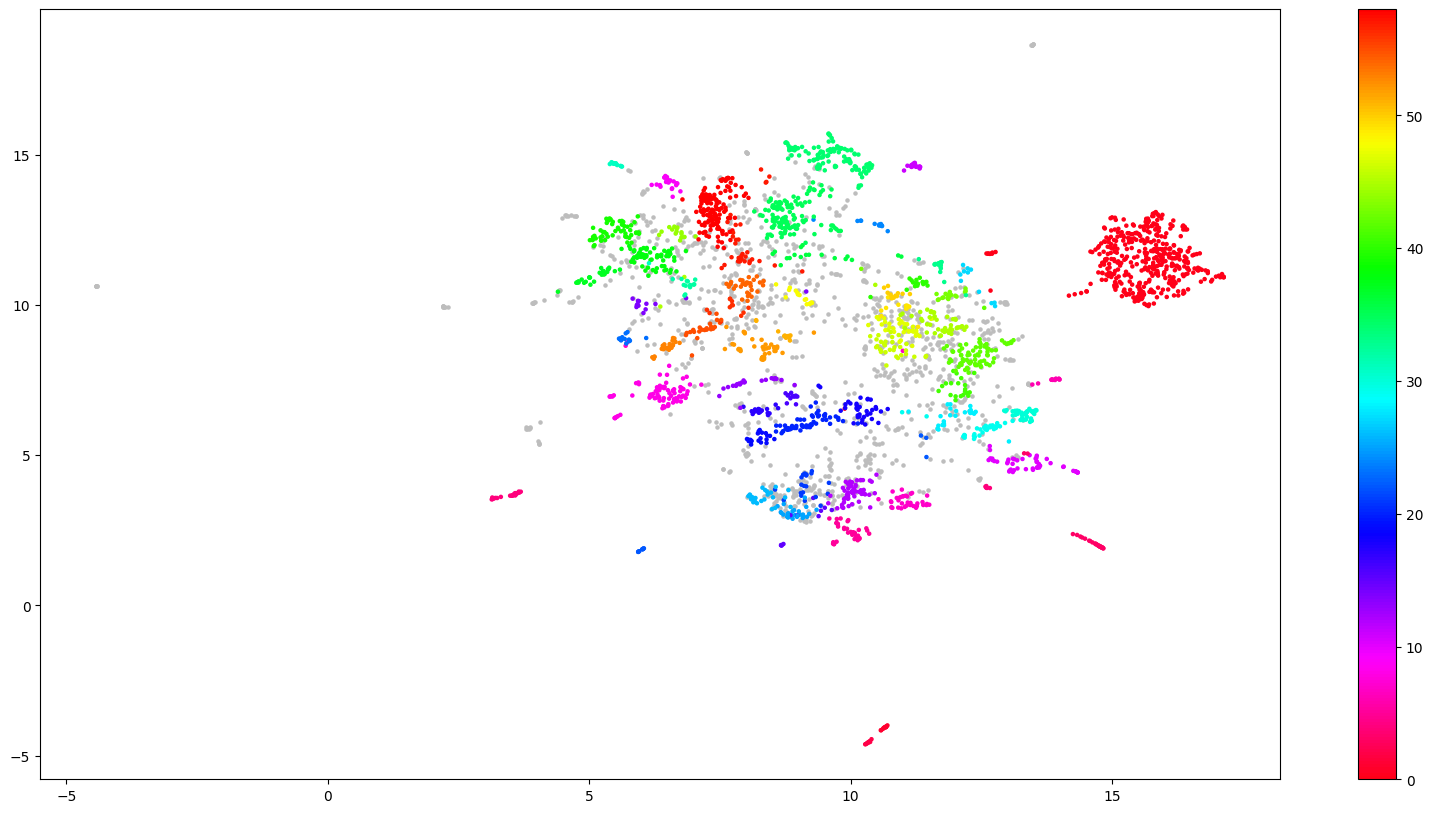

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
outliers = rez_all.loc[rez_all.labels == -1, :]
clustered = rez_all.loc[rez_all.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=5)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5, cmap='hsv_r')
plt.colorbar()

In [20]:
import torch

from transformers import AutoTokenizer, AutoModelWithLMHead





In [21]:
model_name = "0x7194633/keyt5-large" # or 0x7194633/keyt5-base
#model_name = "0x7194633/keyt5-base" # or 0x7194633/keyt5-base

tokenizer = AutoTokenizer.from_pretrained(model_name,cache_dir='./models/')
model = AutoModelWithLMHead.from_pretrained(model_name,cache_dir='./models/', return_dict=True).cuda()


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/root/miniconda3/lib/python3.11/site-packages/transformers/models/auto/modeling_auto.py:1499: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [27]:
rez_all['kw']=''
ooooo=[]
for k in tqdm(range(0,rez_all['labels'].max())):
    for i in range(1):
    
        inputs = tokenizer.encode("summarize: " + rez_all[0][rez_all['labels']==k].iloc[i],return_tensors='pt',max_length=1024*4,truncation=True).to("cuda")
        summary_ids = model.generate(inputs, max_length=50, min_length=30, length_penalty=5., num_beams=2).cuda()
        summary = tokenizer.decode(summary_ids[0])
        summary=summary.replace('<pad> ', ' ')
    
        from collections import Counter
        Counters_found = Counter(summary.replace('; ', ';').replace(' ;', ';').lower().split(';')[:-1])
        most_occur = Counters_found.most_common(10)
        kw=[x[0] for x in most_occur]
        rez_all['kw'][rez_all['labels']==k]=rez_all['kw'][rez_all['labels']==k] + str(kw)
        ooooo.append(kw)






/tmp/ipykernel_1614766/1558320999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rez_all['kw']=''
  0%|                                                                                                                          | 0/57 [00:00<?, ?it/s]/tmp/ipykernel_1614766/1558320999.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rez_all['kw'][rez_all['labels']==k]=rez_all['kw'][rez_all['labels']==k] + str(kw)
  2%|██                                                                                                                | 1/57 [00:02<02:37,  2.81s/

IndexError: single positional indexer is out-of-bounds

In [23]:
rez_all['kw'].value_counts().index

Index(['',
       '['промышленное программирование', 'системное администрирование', ' информационная безопасность']',
       '['ветряки', ' ветряки']', '['ветроэнергетика', ' ветроэнергетика']',
       '['управление продуктом', 'управление продажами', ' информационная безопасность', 'конференции']',
       '['управление продажами', 'электронная коммерция', ' электронная коммерция', 'информационная безопасность']',
       '['конкурс', 'управление продажами', ' синьцзян-уйгурский проект', 'конференция']',
       '['синьхуа', ' синьхуа']',
       '['управление продажами', 'управление проектами', ' управление проектами']',
       '['южный политех', ' южный политех']',
       '['управление продажами', ' управление проектами']',
       '['юань', ' яньян', 'китай']',
       '['управление продуктом', 'управление продажами', ' управление проектами']',
       '['юань', ' юань']',
       '['инженерные системы', 'инженерное проектирование', 'промышленное программирование', ' инженерное проектирова

In [24]:
rez_all['data']=pd.to_datetime(rez_all['data'].str.replace('\D', '', regex=True))
rez_all=rez_all.dropna(subset=['data'])

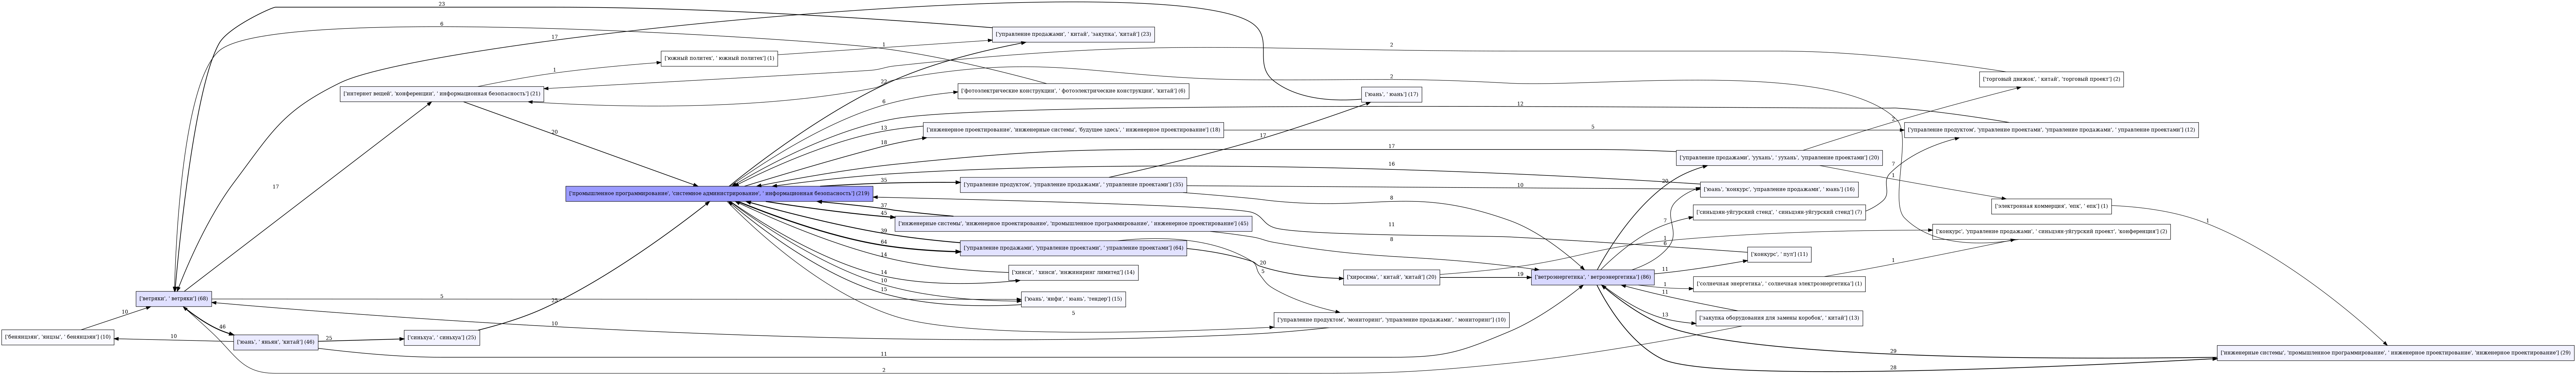

CPU times: user 2.11 s, sys: 2.11 s, total: 4.22 s
Wall time: 2.32 s


In [25]:
%%time
import pm4py

from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.algo.discovery.correlation_mining import algorithm as correlation_miner



df=rez_all[['kw','data']][rez_all['kw']!='']
df.columns=['status','date']
df=df[df['status']!=df['status'].shift(1)]
#df=df[df['status'].isin(df['status'].value_counts()[(df['status'].value_counts()>7)].index)]
df.columns=["concept:name", "time:timestamp"]


frequency_dfg, performance_dfg = correlation_miner.apply(df, variant=correlation_miner.Variants.CLASSIC_SPLIT, parameters={"pm4py:param:activity_key": "concept:name",
                                    "pm4py:param:timestamp_key": "time:timestamp"})
activities_freq = dict(df["concept:name"].value_counts())

gviz_freq = dfg_visualizer.apply(frequency_dfg, variant=dfg_visualizer.Variants.FREQUENCY, activities_count=activities_freq)

gviz_freq.attr(labelloc=r't')
gviz_freq.attr(fontsize=r'30')


dfg_visualizer.view(gviz_freq)
pm4py.visualization.dfg.visualizer.save(gviz_freq,output_file_path='./BP.png')